### Generate updated figures for both continuous and binary outcomes

In [1]:
library(ggplot2)
library(gridExtra)
library(ggpubr)

Loading required package: magrittr



#### load continuous results

In [2]:
ind_cts = read.csv('../results_summary_cts/table_ind_all.txt', sep='\t')
toe_cts = read.csv('../results_summary_cts/table_toe_all.txt', sep='\t')
block_cts = read.csv('../results_summary_cts/table_block_all.txt', sep='\t')

In [3]:
ind_cts$Ratio = as.factor(ind_cts$Ratio)
toe_cts$Ratio = as.factor(toe_cts$Ratio)
block_cts$Ratio = as.factor(block_cts$Ratio)

toe_cts$N = as.factor(toe_cts$N)
toe_cts$P = as.factor(toe_cts$P)

toe_cts_sub1 = toe_cts[toe_cts$Corr %in% 0.1, ]
toe_cts_sub3 = toe_cts[toe_cts$Corr %in% 0.3, ]
toe_cts_sub5 = toe_cts[toe_cts$Corr %in% 0.5, ]
toe_cts_sub7 = toe_cts[toe_cts$Corr %in% 0.7, ]
toe_cts_sub9 = toe_cts[toe_cts$Corr %in% 0.9, ]

block_cts$N = as.factor(block_cts$N)
block_cts$P = as.factor(block_cts$P)
block_cts_sub1 = block_cts[block_cts$Corr %in% 0.1, ]
block_cts_sub3 = block_cts[block_cts$Corr %in% 0.3, ]
block_cts_sub5 = block_cts[block_cts$Corr %in% 0.5, ]
block_cts_sub7 = block_cts[block_cts$Corr %in% 0.7, ]
block_cts_sub9 = block_cts[block_cts$Corr %in% 0.9, ]

#### load binary results (not that should be AUC in stead of ROC -- code checked)

In [4]:
ind_bin = read.csv('../results_summary_bin/table_ind_binary_all.txt', sep='\t')
toe_bin = read.csv('../results_summary_bin/table_toe_binary_all.txt', sep='\t')
block_bin = read.csv('../results_summary_bin/table_block_binary_all.txt', sep='\t')

In [5]:
ind_bin$Ratio = as.factor(ind_bin$Ratio)
toe_bin$Ratio = as.factor(toe_bin$Ratio)
block_bin$Ratio = as.factor(block_bin$Ratio)

toe_bin$N = as.factor(toe_bin$N)
toe_bin$P = as.factor(toe_bin$P)
toe_bin_sub1 = toe_bin[toe_bin$Corr %in% 0.1, ]
toe_bin_sub3 = toe_bin[toe_bin$Corr %in% 0.3, ]
toe_bin_sub5 = toe_bin[toe_bin$Corr %in% 0.5, ]
toe_bin_sub7 = toe_bin[toe_bin$Corr %in% 0.7, ]
toe_bin_sub9 = toe_bin[toe_bin$Corr %in% 0.9, ]

block_bin$N = as.factor(block_bin$N)
block_bin$P = as.factor(block_bin$P)
block_bin_sub1 = block_bin[block_bin$Corr %in% 0.1, ]
block_bin_sub3 = block_bin[block_bin$Corr %in% 0.3, ]
block_bin_sub5 = block_bin[block_bin$Corr %in% 0.5, ]
block_bin_sub7 = block_bin[block_bin$Corr %in% 0.7, ]
block_bin_sub9 = block_bin[block_bin$Corr %in% 0.9, ]

In [7]:
head(block_bin)

,N,P,Corr,Ratio,Stab,ROC,FP,FN,num_select,FDR,ROC_mean,FP_mean,FN_mean,method
,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,50,50,0.1,1,0.03,0.59 ( 0.01 ),2.69 ( 0.14 ),5.3 ( 0.07 ),2.39,0.67,0.59,2.69,5.30,lasso
2,100,50,0.1,0.5,0.11,0.56 ( 0.01 ),2.02 ( 0.15 ),5.02 ( 0.08 ),2.00,0.39,0.56,2.02,5.02,lasso
3,500,50,0.1,0.1,0.28,0.63 ( 0 ),4.52 ( 0.29 ),3 ( 0.11 ),6.52,0.45,0.63,4.52,3.00,lasso
4,1000,50,0.1,0.05,0.39,0.64 ( 0 ),4.74 ( 0.22 ),2.1 ( 0.09 ),7.64,0.44,0.64,4.74,2.10,lasso
5,50,100,0.1,2,0.02,0.62 ( 0.01 ),3.82 ( 0.16 ),5.34 ( 0.07 ),3.48,0.78,0.62,3.82,5.34,lasso
6,100,100,0.1,1,0.07,0.56 ( 0.01 ),2.29 ( 0.19 ),5.27 ( 0.08 ),2.02,0.57,0.56,2.29,5.27,lasso


### Figure 1: MSE/AUC vs. Stability (evaludated by FPR)

In [20]:
block_bin[block_bin$method=='compLasso' & block_bin$Stab %in% c(NA, 0),]

# composittional Lasso perform poor (often select nothing) at Block Corr 0.1

,N,P,Corr,Ratio,Stab,ROC,FP,FN,num_select,FDR,ROC_mean,FP_mean,FN_mean,method
,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
243,500,50,0.1,0.1,NA,0.5 ( 0 ),0 ( 0 ),6 ( 0 ),0.00,NA,0.50,0.00,6.00,compLasso
244,1000,50,0.1,0.05,NA,0.5 ( 0 ),0 ( 0 ),6 ( 0 ),0.00,NA,0.50,0.00,6.00,compLasso
247,500,100,0.1,0.2,NA,0.5 ( 0 ),0 ( 0 ),6 ( 0 ),0.00,NA,0.50,0.00,6.00,compLasso
248,1000,100,0.1,0.1,NA,0.5 ( 0 ),0 ( 0 ),6 ( 0 ),0.00,NA,0.50,0.00,6.00,compLasso
249,50,500,0.1,10,0,0.73 ( 0.01 ),29.62 ( 7.94 ),5.17 ( 0.13 ),30.45,0.9,0.73,29.62,5.17,compLasso
251,500,500,0.1,1,NA,0.5 ( 0 ),0 ( 0 ),6 ( 0 ),0.00,NA,0.50,0.00,6.00,compLasso
252,1000,500,0.1,0.5,NA,0.5 ( 0 ),0 ( 0 ),6 ( 0 ),0.00,NA,0.50,0.00,6.00,compLasso
255,500,1000,0.1,2,0,0.5 ( 0 ),0 ( 0 ),5.98 ( 0.02 ),0.02,0.0,0.50,0.00,5.98,compLasso
256,1000,1000,0.1,1,NA,0.5 ( 0 ),0 ( 0 ),6 ( 0 ),0.00,NA,0.50,0.00,6.00,compLasso


In [22]:
# check other method results at Block Corr 0.1
block_bin[block_bin$Corr == 0.1 & block_bin$Stab %in% c(NA, 0),]

# other method: Stab = 0 or NA (if Stab = 0, then high FPR)

,N,P,Corr,Ratio,Stab,ROC,FP,FN,num_select,FDR,ROC_mean,FP_mean,FN_mean,method
,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
13,50,1000,0.1,20,0,0.62 ( 0.01 ),10.42 ( 0.22 ),5.56 ( 0.06 ),9.86,0.95,0.62,10.42,5.56,lasso
89,50,500,0.1,10,0,0.61 ( 0.01 ),69.03 ( 7.45 ),4.13 ( 0.19 ),69.90,0.96,0.61,69.03,4.13,elnet
90,100,500,0.1,5,0,0.57 ( 0.01 ),70.64 ( 9.13 ),3.91 ( 0.17 ),71.73,0.91,0.57,70.64,3.91,elnet
93,50,1000,0.1,20,0,0.59 ( 0.01 ),103.61 ( 10.54 ),4.34 ( 0.18 ),104.27,0.98,0.59,103.61,4.34,elnet
94,100,1000,0.1,10,0,0.56 ( 0.01 ),103.21 ( 12.75 ),4.15 ( 0.17 ),104.06,0.95,0.56,103.21,4.15,elnet
161,50,50,0.1,1,NA,1 ( 0 ),1 ( 0 ),6 ( 0 ),0.00,NA,1.00,0.00,6.00,rf
165,50,100,0.1,2,NA,1 ( 0 ),1 ( 0 ),6 ( 0 ),0.00,NA,1.00,0.00,6.00,rf
166,100,100,0.1,1,0,1 ( 0 ),5.09 ( 0.21 ),5.6 ( 0.09 ),5.48,0.93,1.00,5.09,5.60,rf
169,50,500,0.1,10,NA,1 ( 0 ),1 ( 0 ),6 ( 0 ),0.00,NA,1.00,0.00,6.00,rf


In [6]:
ind_cts_mse_fpr <- ggplot(ind_cts, aes(x=FDR, y=MSE_mean, color=method, size=Ratio)) + geom_point(alpha=0.8) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Independent', x='False Positive Rate', y='MSE') + ylim(0, 4) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

ind_cts_stab_fpr <- ggplot(ind_cts, aes(x=FDR, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.8) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Independent', x='False Positive Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

toe_cts_mse_fpr <- ggplot(toe_cts, aes(x=FDR, y=MSE_mean, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Toeplitz', x='False Positive Rate', y='MSE') + ylim(0, 4) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

toe_cts_stab_fpr <- ggplot(toe_cts, aes(x=FDR, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Toeplitz', x='False Positive Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

block_cts_mse_fpr <- ggplot(block_cts, aes(x=FDR, y=MSE_mean, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Block', x='False Positive Rate', y='MSE') + ylim(0, 4) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

block_cts_stab_fpr <- ggplot(block_cts, aes(x=FDR, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Block', x='False Positive Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

fig1_cts <- ggarrange(ind_cts_mse_fpr, ind_cts_stab_fpr, toe_cts_mse_fpr, toe_cts_stab_fpr, 
          block_cts_mse_fpr, block_cts_stab_fpr,       
          nrow=3, ncol = 2, align = "hv", labels = "AUTO", common.legend = T, legend = "bottom") 

Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”


In [7]:
ind_bin_ROC_fpr <- ggplot(ind_bin, aes(x=FDR, y=ROC_mean, color=method, size=Ratio)) + geom_point(alpha=0.8) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Independent', x='False Positive Rate', y='AUC') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))
ind_bin_stab_fpr <- ggplot(ind_bin, aes(x=FDR, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.8) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Independent', x='False Positive Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

toe_bin_ROC_fpr <- ggplot(toe_bin, aes(x=FDR, y=ROC_mean, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Toeplitz', x='False Positive Rate', y='AUC') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

toe_bin_stab_fpr <- ggplot(toe_bin, aes(x=FDR, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Toeplitz', x='False Positive Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

block_bin_ROC_fpr <- ggplot(block_bin, aes(x=FDR, y=ROC_mean, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Block', x='False Positive Rate', y='AUC') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

block_bin_stab_fpr <- ggplot(block_bin, aes(x=FDR, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Block', x='False Positive Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

fig1_bin <- ggarrange(ind_bin_ROC_fpr, ind_bin_stab_fpr, toe_bin_ROC_fpr, toe_bin_stab_fpr, block_bin_ROC_fpr, block_bin_stab_fpr,       
  nrow=3, ncol = 2, align = "hv", labels = "AUTO", common.legend = T, legend = "bottom")


Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”
Warning message:
“Removed 27 rows containing missing values (geom_point).”
Warning message:
“Removed 27 rows containing missing values (geom_point).”


Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”
Warning message:
“Removed 27 rows containing missing values (geom_point).”
Warning message:
“Removed 27 rows containing missing values (geom_point).”


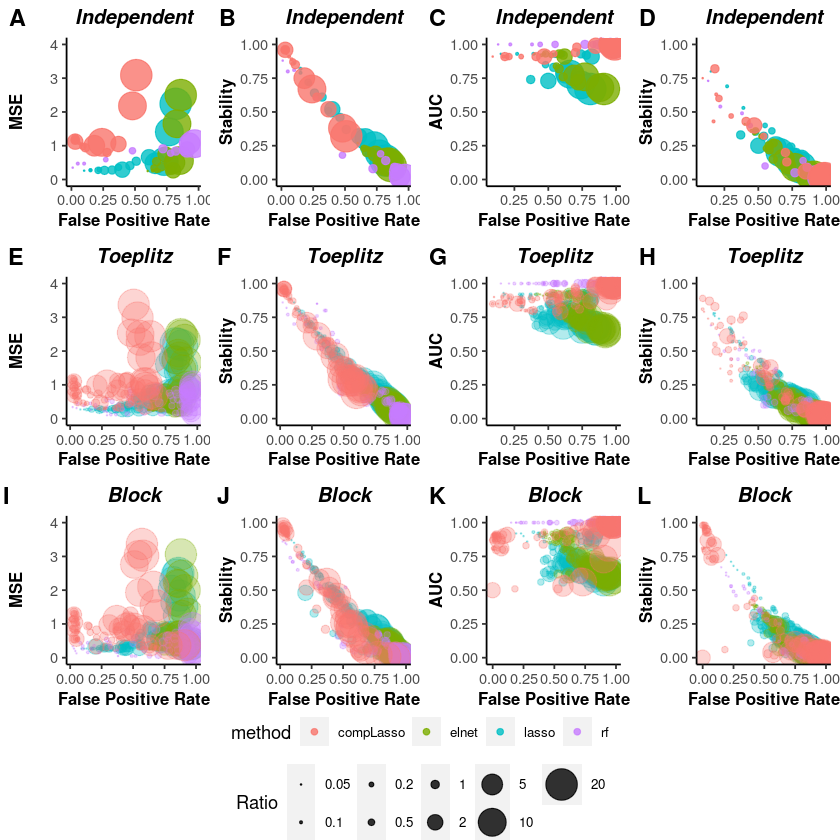

In [8]:
fig1_combined <- ggarrange(ind_cts_mse_fpr, ind_cts_stab_fpr, ind_bin_ROC_fpr, ind_bin_stab_fpr, 
                           toe_cts_mse_fpr, toe_cts_stab_fpr, toe_bin_ROC_fpr, toe_bin_stab_fpr, 
                           block_cts_mse_fpr, block_cts_stab_fpr,  block_bin_ROC_fpr, block_bin_stab_fpr,            
                           nrow=3, ncol = 4, align = "hv", common.legend = T, legend = "bottom",
                           labels = "AUTO") 
fig1_combined

ggsave("../figures_combined/fig1_combined.png", fig1_combined, dpi = 300, width = 8, height = 6)

### Figure S1: MSE/AUC vs. Stability (evaludated by FNR)

In [9]:
ind_cts_mse_fnr <- ggplot(ind_cts, aes(x=FN_mean/6, y=MSE_mean, color=method, size=Ratio)) + geom_point(alpha=0.8) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Independent', x='False Negative Rate', y='MSE')  + ylim(0, 4) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

ind_cts_stab_fnr <- ggplot(ind_cts, aes(x=FN_mean/6, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.8) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Independent', x='False Negative Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

toe_cts_mse_fnr <- ggplot(toe_cts, aes(x=FN_mean/6, y=MSE_mean, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Toeplitz', x='False Negative Rate', y='MSE') + ylim(0, 4) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

toe_cts_stab_fnr <- ggplot(toe_cts, aes(x=FN_mean/6, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Toeplitz', x='False Negative Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

block_cts_mse_fnr <- ggplot(block_cts, aes(x=FN_mean/6, y=MSE_mean, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Block', x='False Negative Rate', y='MSE') + ylim(0, 4) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

block_cts_stab_fnr <- ggplot(block_cts, aes(x=FN_mean/6, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Block', x='False Negative Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

# ggarrange(ind_cts_mse_fnr, ind_cts_stab_fnr, toe_cts_mse_fnr, toe_cts_stab_fnr, block_cts_mse_fnr, block_cts_stab_fnr,       
#   nrow=3, ncol = 2, align = "hv", labels = "AUTO", common.legend = T, legend = "bottom") 

In [10]:
ind_bin_ROC_fnr <- ggplot(ind_bin, aes(x=FN_mean/6, y=ROC_mean, color=method, size=Ratio)) + geom_point(alpha=0.8) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Independent', x='False Negative Rate', y='AUC')  + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

ind_bin_stab_fnr <- ggplot(ind_bin, aes(x=FN_mean/6, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.8) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Independent', x='False Negative Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))


toe_bin_ROC_fnr <- ggplot(toe_bin, aes(x=FN_mean/6, y=ROC_mean, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Toeplitz', x='False Negative Rate', y='AUC') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

toe_bin_stab_fnr <- ggplot(toe_bin, aes(x=FN_mean/6, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Toeplitz', x='False Negative Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

block_bin_ROC_fnr <- ggplot(block_bin, aes(x=FN_mean/6, y=ROC_mean, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Block', x='False Negative Rate', y='AUC') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))

block_bin_stab_fnr <- ggplot(block_bin, aes(x=FN_mean/6, y=Stab, color=method, size=Ratio)) + geom_point(alpha=0.3) + 
         theme(legend.position="bottom", legend.box="vertical", legend.margin=margin()) +
         scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2, 4, 5.5, 7.5, 8.5)) + 
         labs(title='Block', x='False Negative Rate', y='Stability') + ylim(0, 1) +
        theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
              axis.title.x = element_text(size=10, face="bold"),
              axis.title.y = element_text(size=10, face="bold"),
              panel.background = element_blank(), axis.line = element_line(colour = "black"),
              legend.text = element_text(size = 8))


# ggarrange(ind_bin_ROC_fnr, ind_bin_stab_fnr, toe_bin_ROC_fnr, toe_bin_stab_fnr, block_bin_ROC_fnr, block_bin_stab_fnr,       
#   nrow=3, ncol = 2, align = "hv", labels = "AUTO", common.legend = T, legend = "bottom") 

Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”
Warning message:
“Removed 27 rows containing missing values (geom_point).”


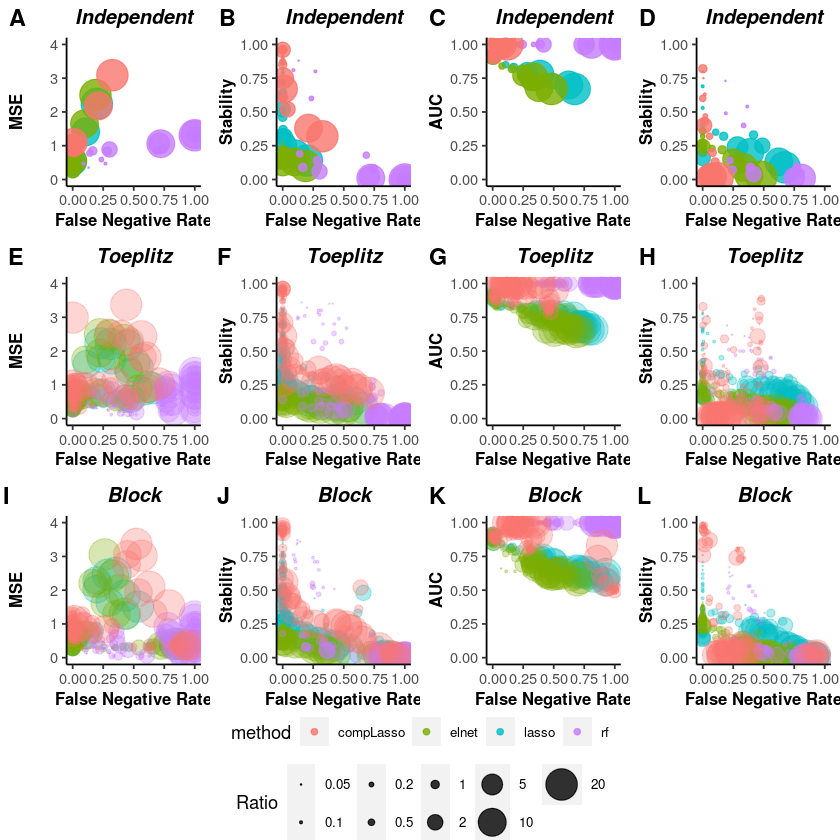

In [11]:
figS1_combined <- ggarrange(ind_cts_mse_fnr, ind_cts_stab_fnr, ind_bin_ROC_fnr, ind_bin_stab_fnr, 
                            toe_cts_mse_fnr, toe_cts_stab_fnr, toe_bin_ROC_fnr, toe_bin_stab_fnr, 
                            block_cts_mse_fnr, block_cts_stab_fnr, block_bin_ROC_fnr, block_bin_stab_fnr,       
                            nrow=3, ncol = 4, align = "hv", labels = "AUTO", common.legend = T, legend = "bottom") 
figS1_combined

ggsave("../figures_combined/figS1_combined.png", figS1_combined, dpi = 300, width = 8, height = 6)

### Figure 2: best method chosen by Stability

In [6]:
toe5_cts_stab <- ggplot(toe_cts_sub5, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.5") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top", 
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                      axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both)

toe9_cts_stab <- ggplot(toe_cts_sub9, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.9") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0,1) 

block5_cts_stab <- ggplot(block_cts_sub5, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.5") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

block1_cts_stab <- ggplot(block_cts_sub1, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.1") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1)

# ggarrange(toe5_cts_stab, toe9_cts_stab, block5_cts_stab, block1_cts_stab,       
#   nrow=2, ncol = 2, labels = "AUTO", common.legend = T, legend = "bottom") 

In [7]:
toe5_bin_stab <- ggplot(toe_bin_sub5, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.5 (Binary)") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top", 
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                      axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1)

toe9_bin_stab <- ggplot(toe_bin_sub9, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.9 (Binary)") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0,1) 

block5_bin_stab <- ggplot(block_bin_sub5, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.5 (Binary)") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

block1_bin_stab <- ggplot(block_bin_sub1, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.1 (Binary)") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1)

# ggarrange(toe5_bin_stab, toe9_bin_stab, block5_bin_stab, block1_bin_stab,       
#   nrow=2, ncol = 2, labels = "AUTO", common.legend = T, legend = "bottom") 


In [8]:
fig2_combined <- ggarrange(toe5_cts_stab + rremove("x.title"), toe9_cts_stab + rremove("x.title"),  
          block5_cts_stab + rremove("x.title"), block1_cts_stab + rremove("x.title"),       
          toe5_bin_stab + rremove("x.title"), toe9_bin_stab + rremove("x.title"), 
          block5_bin_stab, block1_bin_stab, 
          nrow=4, ncol = 2, labels = "AUTO", common.legend = T, legend = "bottom") 

ggsave("../figures_combined/fig2_combined.png", fig2_combined, dpi = 300, width = 6.5, height = 8)

Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 11 rows containing missing values (geom_bar).”


### Figure S2: best method chosen by Stability in easy Toeplitz correlations

In [9]:
toe1_cts_stab <- ggplot(toe_cts_sub1, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.1") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top", 
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                      axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both)

toe3_cts_stab <- ggplot(toe_cts_sub3, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.3") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.3, size=12, face="bold.italic"), 
                      legend.position="top", 
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                      axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both)

toe5_cts_stab <- ggplot(toe_cts_sub5, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.5") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top", 
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                      axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both)

toe7_cts_stab <- ggplot(toe_cts_sub7, aes(fill=method, y=Stab, x=N)) + ylim(0, 1) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.7") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top", 
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                      axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both)

# ggarrange(toe1_cts_stab, toe3_cts_stab, toe5_cts_stab, toe7_cts_stab,       
#   nrow=2, ncol = 2, labels = "AUTO", common.legend = T, legend = "bottom") 

In [10]:
toe1_bin_stab <- ggplot(toe_bin_sub1, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.1 (Binary)") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top", 
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                      axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1)

toe3_bin_stab <- ggplot(toe_bin_sub3, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.3 (Binary)") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.3, size=12, face="bold.italic"), 
                      legend.position="top", 
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                      axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1)

toe5_bin_stab <- ggplot(toe_bin_sub5, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.5 (Binary)") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top", 
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                      axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1)

toe7_bin_stab <- ggplot(toe_bin_sub7, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.7 (Binary)") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top", 
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                      axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1)

# ggarrange(toe1_bin_stab, toe3_bin_stab, toe5_bin_stab, toe7_bin_stab,       
#   nrow=2, ncol = 2, labels = "AUTO", common.legend = T, legend = "bottom")

In [11]:
figS2_combined <- ggarrange(toe1_cts_stab + rremove("x.title"), toe3_cts_stab + rremove("x.title"),  
          toe5_cts_stab + rremove("x.title"), toe7_cts_stab + rremove("x.title"),       
          toe1_bin_stab + rremove("x.title"), toe3_bin_stab + rremove("x.title"), 
          toe5_bin_stab, toe7_bin_stab, 
          nrow=4, ncol = 2, labels = "AUTO", common.legend = T, legend = "bottom") 
ggsave("../figures_combined/figS2_combined.png", figS2_combined, dpi = 300, width = 6.5, height = 8)



Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”


### Figure S3: best method chosen by Stability in easy Block correlations

In [16]:
block3_cts_stab <- ggplot(block_cts_sub3, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.3") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

block5_cts_stab <- ggplot(block_cts_sub5, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.5") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

block7_cts_stab <- ggplot(block_cts_sub7, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.7") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1)

block9_cts_stab <- ggplot(block_cts_sub9, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.9") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

# ggarrange(block9_cts_stab, block7_cts_stab, block5_cts_stab, block3_cts_stab,    
#   nrow=2, ncol = 2, labels = "AUTO", common.legend = T, legend = "bottom")

In [15]:
block3_bin_stab <- ggplot(block_bin_sub3, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.3 (Binary)") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

block5_bin_stab <- ggplot(block_bin_sub5, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.5 (Binary)") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

block7_bin_stab <- ggplot(block_bin_sub7, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.7 (Binary)") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

block9_bin_stab <- ggplot(block_bin_sub9, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.9 (Binary)") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

# ggarrange(block9_bin_stab, block7_bin_stab, block5_bin_stab, block3_bin_stab,    
#   nrow=2, ncol = 2, labels = "AUTO", common.legend = T, legend = "bottom") 

In [18]:
figS3_combined <- ggarrange(block9_cts_stab + rremove("x.title"), block7_cts_stab + rremove("x.title"),  
          block5_cts_stab + rremove("x.title"), block3_cts_stab + rremove("x.title"),       
          block9_bin_stab + rremove("x.title"), block7_bin_stab + rremove("x.title"), 
          block5_bin_stab, block3_bin_stab, 
          nrow=4, ncol = 2, labels = "AUTO", common.legend = T, legend = "bottom") 
ggsave("../figures_combined/figS3_combined.png", figS3_combined, dpi = 300, width = 6.5, height = 8)

Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”


### Figure 3: best method based on MSE/AUC

In [12]:
toe9_cts_mse <- ggplot(toe_cts_sub9, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz 0.9") + xlab('') + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1)

block1_cts_mse <- ggplot(block_cts_sub1, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab('') + ggtitle("Block 0.1") + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

toe9_cts_FNR <- ggplot(toe_cts_sub9, aes(fill=method, y=FN_mean/6, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab('') + ylab("FNR") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) 

block1_cts_FNR <- ggplot(block_cts_sub1, aes(fill=method, y=FN_mean/6, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab('') + ylab("FNR") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) 

toe9_cts_FPR <- ggplot(toe_cts_sub9, aes(fill=method, y=FP_mean/num_select, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab("Number of Samples") + ylab("FPR") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) 

block1_cts_FPR <- ggplot(block_cts_sub1, aes(fill=method, y=FP_mean/num_select, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab("Number of Samples") + ylab("FPR") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both)

# ggarrange(toe9_cts_mse, block1_cts_mse, toe9_cts_FNR, block1_cts_FNR, toe9_cts_FPR, block1_cts_FPR,         
#   nrow=3, ncol = 2, labels = "AUTO", common.legend = T, legend = "bottom")  

In [13]:
toe9_bin_ROC <- ggplot(toe_bin_sub9, aes(fill=method, y=ROC_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz 0.9 (Binary)") + xlab('') + ylab("AUC") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1)

block1_bin_ROC <- ggplot(block_bin_sub1, aes(fill=method, y=ROC_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab('') + ggtitle("Block 0.1 (Binary)") + ylab("AUC") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) 

toe9_bin_FNR <- ggplot(toe_bin_sub9, aes(fill=method, y=FN_mean/6, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab('') + ylab("FNR") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) 

block1_bin_FNR <- ggplot(block_bin_sub1, aes(fill=method, y=FN_mean/6, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab('') + ylab("FNR") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) 

toe9_bin_FPR <- ggplot(toe_bin_sub9, aes(fill=method, y=FP_mean/num_select, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab("Number of Samples") + ylab("FPR") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both) 

block1_bin_FPR <- ggplot(block_bin_sub1, aes(fill=method, y=FP_mean/num_select, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                xlab("Number of Samples") + ylab("FPR") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                      legend.position="top",
                      axis.title.x = element_text(size=10, face="bold"),
                      axis.title.y = element_text(size=10, face="bold"),
                     axis.text.x = element_text(angle = 55)) + 
                facet_grid(~P, labeller = label_both)

# ggarrange(toe9_bin_ROC, block1_bin_ROC, toe9_bin_FNR, block1_bin_FNR, toe9_bin_FPR, block1_bin_FPR,         
#   nrow=3, ncol = 2, labels = "AUTO", common.legend = T, legend = "bottom")

In [14]:
fig3_combined <- ggarrange(toe9_cts_mse, block1_cts_mse, toe9_bin_ROC, block1_bin_ROC,
                           toe9_cts_FNR, block1_cts_FNR, toe9_bin_FNR, block1_bin_FNR, 
                           toe9_cts_FPR, block1_cts_FPR, toe9_bin_FPR, block1_bin_FPR,
                           nrow=3, ncol = 4, labels = "AUTO", common.legend = T, legend = "bottom") 
ggsave("../figures_combined/fig3_combined.png", fig3_combined, dpi = 300, width = 10, height = 6)

Warning message:
“Removed 1 rows containing missing values (geom_bar).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 11 rows containing missing values (geom_bar).”


### Figure S4: check feature correlation impact (continuous, selected case)

In [4]:
# load results for 4 methods
load('../sim_data/independent_Lasso.RData')
load('../sim_data/independent_Elnet.RData')
load('../sim_data/independent_compLasso.RData')
load('../sim_data/independent_RF.RData')

# check index
b = 14
print(paste0('lasso: ', 'n: ', results_ind_lasso[[b]]$n, ' p: ', results_ind_lasso[[b]]$p, 
            ' rou: ', results_ind_lasso[[b]]$rou))
print(paste0('elnet: ', 'n: ', results_ind_elnet[[b]]$n, ' p: ', results_ind_elnet[[b]]$p, 
            ' rou: ', results_ind_elnet[[b]]$rou))
print(paste0('complasso: ', 'n: ', results_ind_compLasso[[b]]$n, ' p: ', results_ind_compLasso[[b]]$p, 
            ' rou: ', results_ind_compLasso[[b]]$rou))
print(paste0('rf: ', 'n: ', results_ind_rf[[b]]$n, ' p: ', results_ind_rf[[b]]$p, 
            ' rou: ', results_ind_rf[[b]]$rou))

# load simulated data
load('../sim_data/sim_independent_P_1000_N_100.RData', dat <- new.env())
i = 1
sub = dat$sim_array[[i]]
coef = sub$beta
coef.true = which(coef != 0)
coef.true

# summarize results
table_ind = data.frame(matrix(0, nrow=1000, ncol=6))
colnames(table_ind) = c('FeatureIndex', 'FeatureTrue', 'Lasso', 'Elnet', 'compLasso', 'RF')
table_ind$FeatureIndex = seq(1, 1000, 1)
table_ind$FeatureTrue[coef.true] =  1

table_ind$Lasso = colMeans(results_ind_lasso[[b]]$Stab.table)
table_ind$Elnet = colMeans(results_ind_elnet[[b]]$Stab.table)
table_ind$compLasso = colMeans(results_ind_compLasso[[b]]$Stab.table)
table_ind$RF = colMeans(results_ind_rf[[b]]$Stab.table)

# zoom in first 15 features
ind_cts_Lasso <- ggplot(table_ind, aes(x=FeatureIndex, y=Lasso, color=as.factor(FeatureTrue))) + 
             geom_point() + scale_color_manual(values=c('black', 'red')) + 
             theme(legend.position="top") + labs(color ="True Feature") + 
             labs(title='Lasso (Independent)', x='Feature Index', y='Selection Prob') +
             theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                   axis.title.x = element_text(size=10, face="bold"),
                   axis.title.y = element_text(size=10, face="bold"),
                   panel.background = element_blank(), axis.line = element_line(colour = "black"),
                   legend.text = element_text(size = 8)) + xlim(1, 15) + ylim(0, 1)


ind_cts_Elnet <- ggplot(table_ind, aes(x=FeatureIndex, y=Elnet, color=as.factor(FeatureTrue))) + 
             geom_point() + scale_color_manual(values=c('black', 'red')) + 
             theme(legend.position="top") + labs(color ="True Feature") +
             labs(title='Elastic Net (Independent)', x='Feature Index', y='Selection Prob') +
             theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                   axis.title.x = element_text(size=10, face="bold"),
                   axis.title.y = element_text(size=10, face="bold"),
                   panel.background = element_blank(), axis.line = element_line(colour = "black"),
                   legend.text = element_text(size = 8)) + xlim(1, 15) + ylim(0, 1)


ind_cts_compLasso <- ggplot(table_ind, aes(x=FeatureIndex, y=compLasso, color=as.factor(FeatureTrue))) + 
             geom_point() + scale_color_manual(values=c('black', 'red')) + 
             theme(legend.position="top") + labs(color ="True Feature") +
             labs(title='Compositional Lasso (Ind)', x='Feature Index', y='Selection Prob') +
             theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                   axis.title.x = element_text(size=10, face="bold"),
                   axis.title.y = element_text(size=10, face="bold"),
                   panel.background = element_blank(), axis.line = element_line(colour = "black"),
                   legend.text = element_text(size = 8)) + xlim(1, 15) + ylim(0, 1)


ind_cts_RF <- ggplot(table_ind, aes(x=FeatureIndex, y=RF, color=as.factor(FeatureTrue))) + 
             geom_point() + scale_color_manual(values=c('black', 'red')) + 
             theme(legend.position="top") + labs(color ="True Feature") +
             labs(title='Random Forests (Independent)', x='Feature Index', y='Selection Prob') +
             theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                   axis.title.x = element_text(size=10, face="bold"),
                   axis.title.y = element_text(size=10, face="bold"),
                   panel.background = element_blank(), axis.line = element_line(colour = "black"),
                   legend.text = element_text(size = 8)) + xlim(1, 15) + ylim(0, 1)
 


[1] "lasso: n: 100 p: 1000 rou: 0"
[1] "elnet: n: 100 p: 1000 rou: 0"
[1] "complasso: n: 100 p: 1000 rou: 0"
[1] "rf: n: 100 p: 1000 rou: 0"


[1] 1 2 3 6 7 8

In [5]:
# load results for 4 methods
load('../sim_data/toe_Lasso.RData')
load('../sim_data/toe_Elnet.RData')
load('../sim_data/toe_compLasso.RData')
load('../sim_data/toe_RF.RData')

# check index
b = 78
print(paste0('lasso: ', 'n: ', results_toe_lasso[[b]]$n, ' p: ', results_toe_lasso[[b]]$p, 
            ' rou: ', results_toe_lasso[[b]]$rou))
print(paste0('elnet: ', 'n: ', results_toe_elnet[[b]]$n, ' p: ', results_toe_elnet[[b]]$p, 
            ' rou: ', results_toe_elnet[[b]]$rou))
print(paste0('complasso: ', 'n: ', results_toe_compLasso[[b]]$n, ' p: ', results_toe_compLasso[[b]]$p, 
            ' rou: ', results_toe_compLasso[[b]]$rou))
print(paste0('complasso: ', 'n: ', results_toe_rf[[b]]$n, ' p: ', results_toe_rf[[b]]$p, 
            ' rou: ', results_toe_rf[[b]]$rou))

# load simulated data
load('../sim_data/sim_toeplitz_corr0.9P_1000_N_100.RData', dat <- new.env())
i = 1
sub = dat$sim_array[[i]]
coef = sub$beta
coef.true = which(coef != 0)
coef.true

# summarize results
table_toe = data.frame(matrix(0, nrow=1000, ncol=6))
colnames(table_toe) = c('FeatureIndex', 'FeatureTrue', 'Lasso', 'Elnet', 'compLasso', 'RF')
table_toe$FeatureIndex = seq(1, 1000, 1)
table_toe$FeatureTrue[coef.true] =  1

table_toe$Lasso = colMeans(results_toe_lasso[[b]]$Stab.table)
table_toe$Elnet = colMeans(results_toe_elnet[[b]]$Stab.table)
table_toe$compLasso = colMeans(results_toe_compLasso[[b]]$Stab.table)
table_toe$RF = colMeans(results_toe_rf[[b]]$Stab.table)

# zoom in first 15 features
toe_cts_Lasso <- ggplot(table_toe, aes(x=FeatureIndex, y=Lasso, color=as.factor(FeatureTrue))) + 
             geom_point() + scale_color_manual(values=c('black', 'red')) + 
             theme(legend.position="top") + labs(color ="True Feature") + 
             labs(title='Lasso (Toeplitz 0.9)', x='Feature Index', y='Selection Prob') +
             theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                   axis.title.x = element_text(size=10, face="bold"),
                   axis.title.y = element_text(size=10, face="bold"),
                   panel.background = element_blank(), axis.line = element_line(colour = "black"),
                   legend.text = element_text(size = 8)) + xlim(1, 15) + ylim(0, 1)


toe_cts_Elnet <- ggplot(table_toe, aes(x=FeatureIndex, y=Elnet, color=as.factor(FeatureTrue))) + 
             geom_point() + scale_color_manual(values=c('black', 'red')) + 
             theme(legend.position="top") + labs(color ="True Feature") +
             labs(title='Elastic Net (Toeplitz 0.9)', x='Feature Index', y='Selection Prob') +
             theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                   axis.title.x = element_text(size=10, face="bold"),
                   axis.title.y = element_text(size=10, face="bold"),
                   panel.background = element_blank(), axis.line = element_line(colour = "black"),
                   legend.text = element_text(size = 8)) + xlim(1, 15) + ylim(0, 1)


toe_cts_compLasso <- ggplot(table_toe, aes(x=FeatureIndex, y=compLasso, color=as.factor(FeatureTrue))) + 
             geom_point() + scale_color_manual(values=c('black', 'red')) + 
             theme(legend.position="top") + labs(color ="True Feature") +
             labs(title='Compositional Lasso (Toeplitz 0.9)', x='Feature Index', y='Selection Prob') +
             theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                   axis.title.x = element_text(size=10, face="bold"),
                   axis.title.y = element_text(size=10, face="bold"),
                   panel.background = element_blank(), axis.line = element_line(colour = "black"),
                   legend.text = element_text(size = 8)) + xlim(1, 15) + ylim(0, 1)


toe_cts_RF <- ggplot(table_toe, aes(x=FeatureIndex, y=RF, color=as.factor(FeatureTrue))) + 
             geom_point() + scale_color_manual(values=c('black', 'red')) + 
             theme(legend.position="top") + labs(color ="True Feature") +
             labs(title='Random Forests (Toeplitz 0.9)', x='Feature Index', y='Selection Prob') +
             theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                   axis.title.x = element_text(size=10, face="bold"),
                   axis.title.y = element_text(size=10, face="bold"),
                   panel.background = element_blank(), axis.line = element_line(colour = "black"),
                   legend.text = element_text(size = 8)) + xlim(1, 15) + ylim(0, 1)
 


[1] "lasso: n: 100 p: 1000 rou: 0.9"
[1] "elnet: n: 100 p: 1000 rou: 0.9"
[1] "complasso: n: 100 p: 1000 rou: 0.9"
[1] "complasso: n: 100 p: 1000 rou: 0.9"


[1] 1 2 3 6 7 8

In [7]:
figS4_combined <- ggarrange(ind_cts_Lasso, toe_cts_Lasso, 
                       ind_cts_Elnet, toe_cts_Elnet,
                       ind_cts_compLasso, toe_cts_compLasso,
                       ind_cts_RF, toe_cts_RF,      
                       nrow=4, ncol = 2, align = "hv", labels = "AUTO", 
                       common.legend = T, legend = "bottom")


ggsave("../figures_combined/figS4_combined.png", figS4_combined, dpi = 300, width = 6.5, height = 8)

Warning message:
“Removed 985 rows containing missing values (geom_point).”
Warning message:
“Removed 985 rows containing missing values (geom_point).”
Warning message:
“Removed 985 rows containing missing values (geom_point).”
Warning message:
“Removed 985 rows containing missing values (geom_point).”
Warning message:
“Removed 985 rows containing missing values (geom_point).”
Warning message:
“Removed 985 rows containing missing values (geom_point).”
Warning message:
“Removed 985 rows containing missing values (geom_point).”
Warning message:
“Removed 985 rows containing missing values (geom_point).”
Warning message:
“Removed 985 rows containing missing values (geom_point).”


### Supplementary Figure 5: number of features (continuous, selected case)

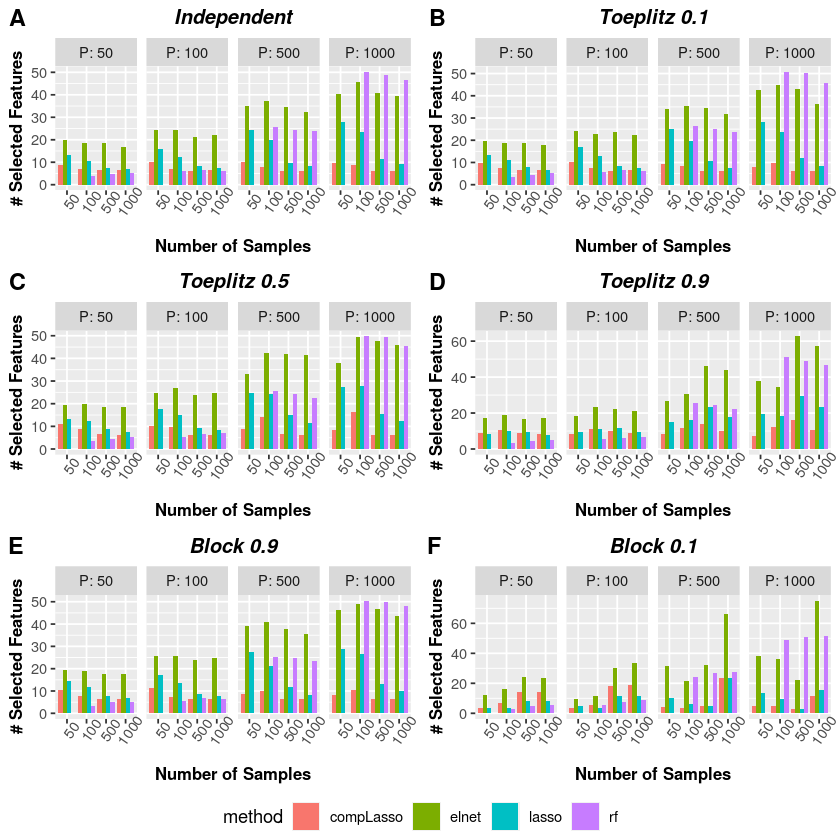

In [20]:
ind_num_select <- ggplot(ind_cts, aes(fill=method, y=num_select, x=as.factor(N))) + 
            geom_bar(position="dodge", stat="identity") + 
            ggtitle("Independent") + xlab("Number of Samples") + ylab("# Selected Features") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                  legend.position="top", 
                    axis.title.x = element_text(size=10, face="bold"),
                    axis.title.y = element_text(size=10, face="bold"),
                    axis.text.x = element_text(angle = 55)) + 
                    facet_grid(~P, labeller = label_both)

toe1_num_select <- ggplot(toe_cts[toe_cts$Corr %in% 0.1,], aes(fill=method, y=num_select, x=as.factor(N))) + 
            geom_bar(position="dodge", stat="identity") + 
            ggtitle("Toeplitz 0.1") + xlab("Number of Samples") + ylab("# Selected Features") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                  legend.position="top", 
                    axis.title.x = element_text(size=10, face="bold"),
                    axis.title.y = element_text(size=10, face="bold"),
                    axis.text.x = element_text(angle = 55)) + 
                    facet_grid(~P, labeller = label_both)

toe5_num_select <- ggplot(toe_cts[toe_cts$Corr %in% 0.5,], aes(fill=method, y=num_select, x=as.factor(N))) + 
            geom_bar(position="dodge", stat="identity") + 
            ggtitle("Toeplitz 0.5") + xlab("Number of Samples") + ylab("# Selected Features") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                  legend.position="top", 
                    axis.title.x = element_text(size=10, face="bold"),
                    axis.title.y = element_text(size=10, face="bold"),
                    axis.text.x = element_text(angle = 55)) + 
                    facet_grid(~P, labeller = label_both)

toe9_num_select <- ggplot(toe_cts[toe_cts$Corr %in% 0.9,], aes(fill=method, y=num_select, x=as.factor(N))) + 
            geom_bar(position="dodge", stat="identity") + 
            ggtitle("Toeplitz 0.9") + xlab("Number of Samples") + ylab("# Selected Features") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                  legend.position="top", 
                    axis.title.x = element_text(size=10, face="bold"),
                    axis.title.y = element_text(size=10, face="bold"),
                    axis.text.x = element_text(angle = 55)) + 
                    facet_grid(~P, labeller = label_both)

block9_num_select <- ggplot(block_cts[block_cts$Corr %in% 0.9,], aes(fill=method, y=num_select, x=as.factor(N))) + 
            geom_bar(position="dodge", stat="identity") + 
            ggtitle("Block 0.9") + xlab("Number of Samples") + ylab("# Selected Features") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                  legend.position="top", 
                    axis.title.x = element_text(size=10, face="bold"),
                    axis.title.y = element_text(size=10, face="bold"),
                    axis.text.x = element_text(angle = 55)) + 
                    facet_grid(~P, labeller = label_both)

block1_num_select <- ggplot(block_cts[block_cts$Corr %in% 0.1,], aes(fill=method, y=num_select, x=as.factor(N))) + 
            geom_bar(position="dodge", stat="identity") + 
            ggtitle("Block 0.1") + xlab("Number of Samples") + ylab("# Selected Features") + 
                theme(plot.title = element_text(hjust = 0.5, size=12, face="bold.italic"), 
                  legend.position="top", 
                    axis.title.x = element_text(size=10, face="bold"),
                    axis.title.y = element_text(size=10, face="bold"),
                    axis.text.x = element_text(angle = 55)) + 
                    facet_grid(~P, labeller = label_both)

fig_cts_num_select <- ggarrange(ind_num_select, toe1_num_select, 
                       toe5_num_select, toe9_num_select, 
                       block9_num_select, block1_num_select,    
                       nrow=3, ncol = 2, align = "hv", labels = "AUTO", 
                       common.legend = T, legend = "bottom") 
fig_cts_num_select
ggsave("../figures_combined/fig_cts_num_select.png", fig_cts_num_select, dpi = 300, width = 6.5, height = 8)